In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
satoru = cv2.cvtColor(cv2.imread('satoru.jpg'),cv2.COLOR_BGR2RGB)

In [3]:
def plot_image(img):
    plt.imshow(img,cmap="grey")
    plt.axis('off')
    plt.show()

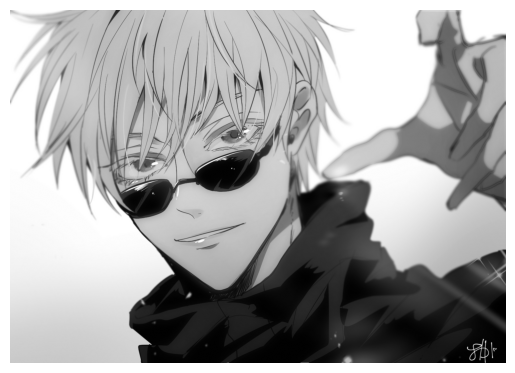

In [4]:
satoru = cv2.cvtColor(satoru,cv2.COLOR_RGB2GRAY)
plot_image(satoru)

***NOISE ADDING***

**Gaussian Noise:**

In [5]:
def add_gaussian_noise(img,mean = 0,std=10):
    noise = np.random.normal(mean,std,img.shape).astype(np.uint8)
    noise_image = np.add(img,noise)
    return noise_image

**Impulse noise**

In [6]:
def add_salt_and_pepper(img,noise_ratio = 0.3):
    result = img.copy()
    h,w = img.shape
    noisy_pixel = int(h*w*noise_ratio)
    for i in range(noisy_pixel):
        row,col = np.random.randint(0,h),np.random.randint(0,w)
        if np.random.rand() < 0.5:
            result[row,col] = 0
        else:
            result[row,col] = 255
    return result

**Random noise**

In [7]:
def add_random_noise(img,intensity = 25):
    result_img = img.copy()
    random_noise = np.random.randint(-intensity,intensity+1,img.shape)
    result_img = np.clip(result_img + random_noise,0,255).astype(np.uint8)
    return result_img

**Uniform noise**

In [8]:
def add_uniform_noise(img):
    result_img = img.copy()
    uniform_noise = np.random.uniform(0,80,img.shape).astype(np.uint8)
    result_img = cv2.add(result_img,uniform_noise)
    return result_img

**Exponential noise**

In [9]:
def add_exponential_noise(img,sl = 1):
    result_img = img.copy()
    exponential_noise = np.random.exponential(scale = sl,size = img.shape).astype(np.uint8)
    result_img = cv2.add(result_img,exponential_noise)
    return result_img

**Gamma**

In [10]:
def add_gamma_noise(img,sl = 1,sp = 0.5):
    result_img = img.copy()
    gamma_noise = np.random.gamma(shape = sp,scale = sl,size = img.shape).astype(np.uint8)
    result_img = cv2.add(result_img,gamma_noise)
    return result_img

**Rayleigh noise**

In [11]:
def add_rayleigh_noise(img,sl = 1):
    result_img = img.copy()
    rayleigh_noise = np.random.rayleigh(scale = sl,size = img.shape).astype(np.uint8)
    result_img = cv2.add(result_img,rayleigh_noise)
    return result_img

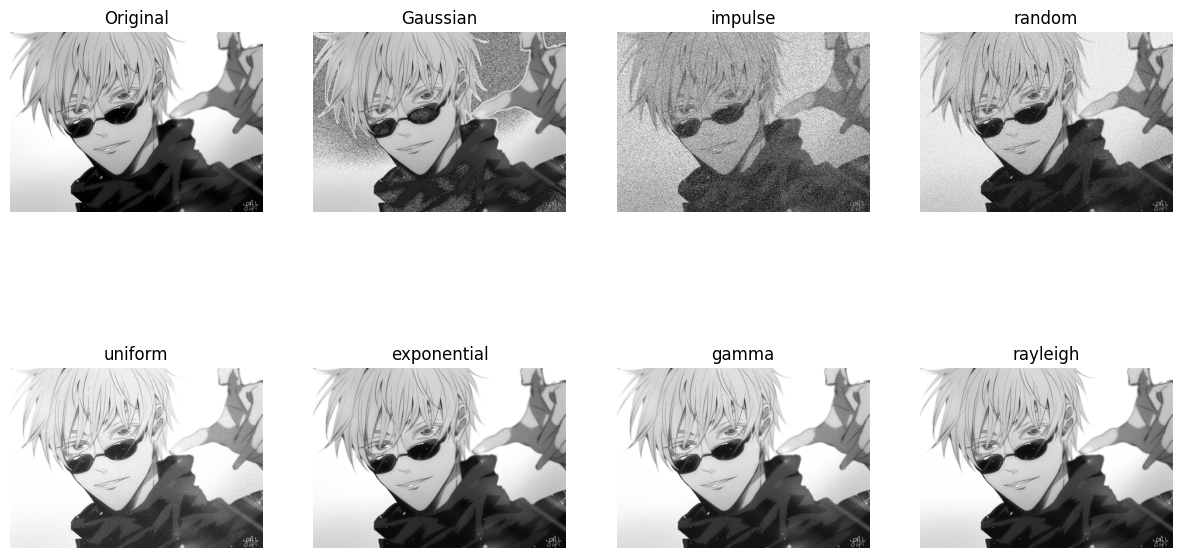

In [12]:
img_list = [satoru,add_gaussian_noise(satoru),add_salt_and_pepper(satoru,0.5),add_random_noise(satoru,80),add_uniform_noise(satoru),add_exponential_noise(satoru,10),add_gamma_noise(satoru,10,2),add_rayleigh_noise(satoru,10)]
img_title = ['Original','Gaussian','impulse','random','uniform','exponential','gamma','rayleigh']
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i in range(8):
    ax = axs[i // 4, i % 4]
    ax.imshow(img_list[i], cmap='gray')  
    ax.set_title(img_title[i])
    ax.axis('off')  
plt.show()


***NOISE RESTORATION***

In [13]:
def arithmetic_mean_filter(image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1
    filtered_image = cv2.blur(image, (kernel_size, kernel_size))
    return filtered_image

In [14]:
def geometric_mean_filter(image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            filtered_image[i, j] = np.exp(np.mean(np.log(neighborhood + 1e-5)))
    return filtered_image

In [15]:
def harmonic_mean_filter(image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            filtered_image[i, j] = kernel_size * kernel_size / np.sum(1 / (neighborhood + 1e-5))
    return filtered_image

In [16]:
def median_filter(image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            sorted_values = np.sort(neighborhood, axis=None)
            median_value = sorted_values[len(sorted_values) // 2]
            filtered_image[i, j] = median_value
    return filtered_image

In [17]:
def min_filter(image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            min_value  = np.min(neighborhood)
            filtered_image[i, j] = min_value
    return filtered_image

In [18]:
def max_filter(image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            max_value  = np.max(neighborhood)
            filtered_image[i, j] = max_value
    return filtered_image

In [19]:


def mid_point_filter(image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            max_value = np.max(neighborhood)
            min_value = np.min(neighborhood)
            mid_point  = (max_value + min_value) // 2
            mid_point = np.clip(mid_point, 0, 255)  # Ensure the value is within the valid range
            filtered_image[i, j] = mid_point
    return filtered_image



In [103]:
Gsatoru = add_gaussian_noise(satoru)
a,b,c,d,e,f,g = arithmetic_mean_filter(Gsatoru,5) , geometric_mean_filter(Gsatoru,5),harmonic_mean_filter(Gsatoru,5),median_filter(Gsatoru,5),min_filter(Gsatoru,5),max_filter(Gsatoru,5),mid_point_filter(Gsatoru,5)

C:\Users\prave\AppData\Local\Temp\ipykernel_2968\2672586117.py:12: RuntimeWarning: overflow encountered in scalar add
  mid_point  = (max_value + min_value) // 2


In [105]:
Gsatoru = add_salt_and_pepper(satoru)
a,b,c,d,e,f,g = arithmetic_mean_filter(Gsatoru,5) , geometric_mean_filter(Gsatoru,5),harmonic_mean_filter(Gsatoru,5),median_filter(Gsatoru,5),min_filter(Gsatoru,5),max_filter(Gsatoru,5),mid_point_filter(Gsatoru,5)

C:\Users\prave\AppData\Local\Temp\ipykernel_2968\2672586117.py:12: RuntimeWarning: overflow encountered in scalar add
  mid_point  = (max_value + min_value) // 2


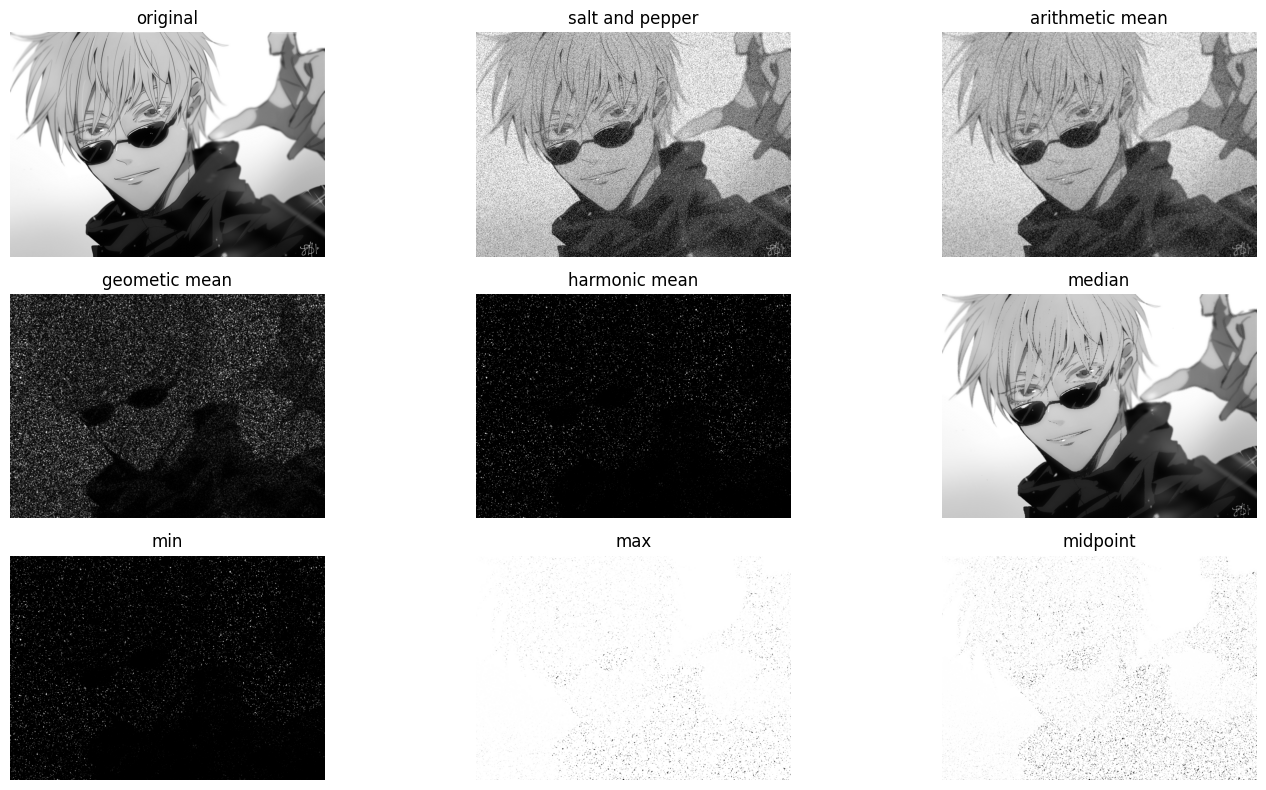

In [106]:
img_list = [satoru,Gsatoru,a,b,c,d,e,f,g]
img_title = ['original','salt and pepper','arithmetic mean','geometic mean','harmonic mean','median','min','max','midpoint']
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(img_list[i], cmap='gray')
    ax.set_title(img_title[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [107]:
Gsatoru = add_random_noise(satoru,50)
a,b,c,d,e,f,g = arithmetic_mean_filter(Gsatoru,5) , geometric_mean_filter(Gsatoru,5),harmonic_mean_filter(Gsatoru,5),median_filter(Gsatoru,5),min_filter(Gsatoru,5),max_filter(Gsatoru,5),mid_point_filter(Gsatoru,5)

C:\Users\prave\AppData\Local\Temp\ipykernel_2968\2672586117.py:12: RuntimeWarning: overflow encountered in scalar add
  mid_point  = (max_value + min_value) // 2


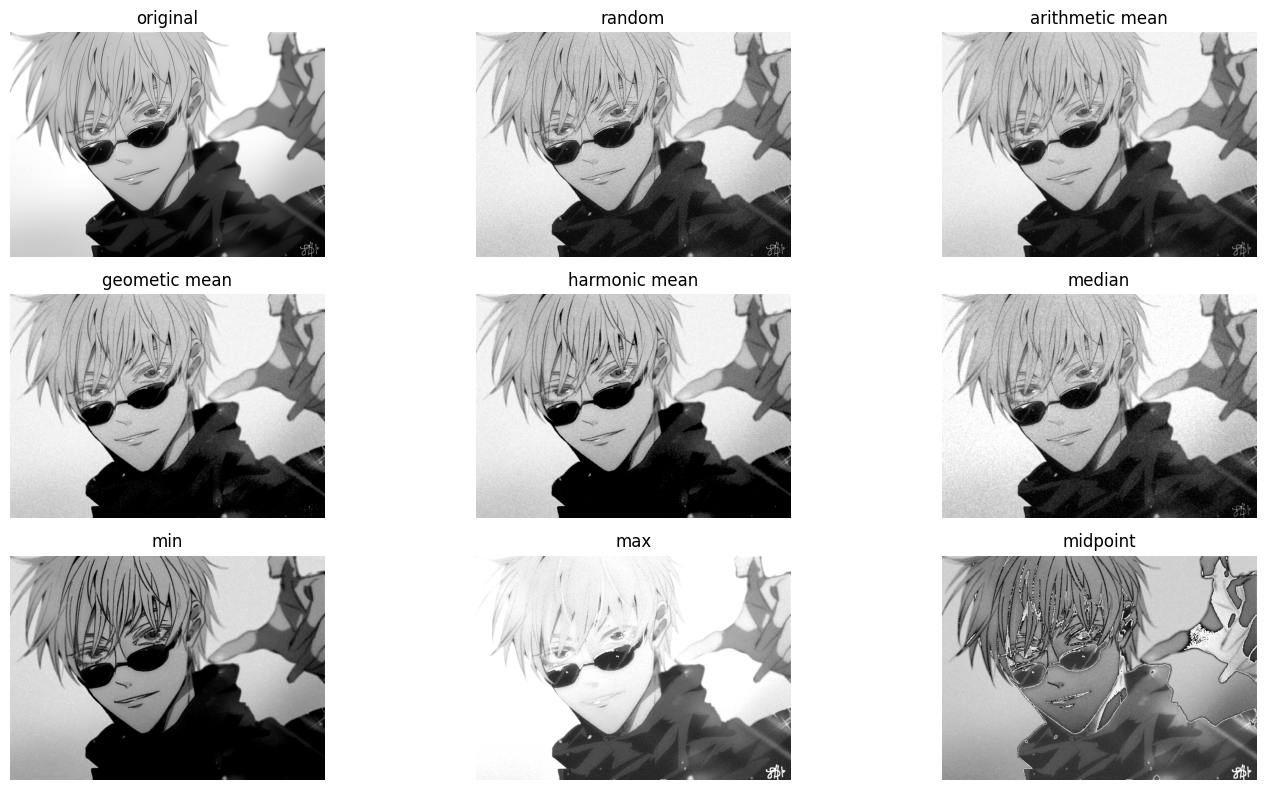

In [108]:
img_list = [satoru,Gsatoru,a,b,c,d,e,f,g]
img_title = ['original','random','arithmetic mean','geometic mean','harmonic mean','median','min','max','midpoint']
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(img_list[i], cmap='gray')
    ax.set_title(img_title[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [109]:
Gsatoru = add_uniform_noise(satoru)
a,b,c,d,e,f,g = arithmetic_mean_filter(Gsatoru,5) , geometric_mean_filter(Gsatoru,5),harmonic_mean_filter(Gsatoru,5),median_filter(Gsatoru,5),min_filter(Gsatoru,5),max_filter(Gsatoru,5),mid_point_filter(Gsatoru,5)

C:\Users\prave\AppData\Local\Temp\ipykernel_2968\2672586117.py:12: RuntimeWarning: overflow encountered in scalar add
  mid_point  = (max_value + min_value) // 2


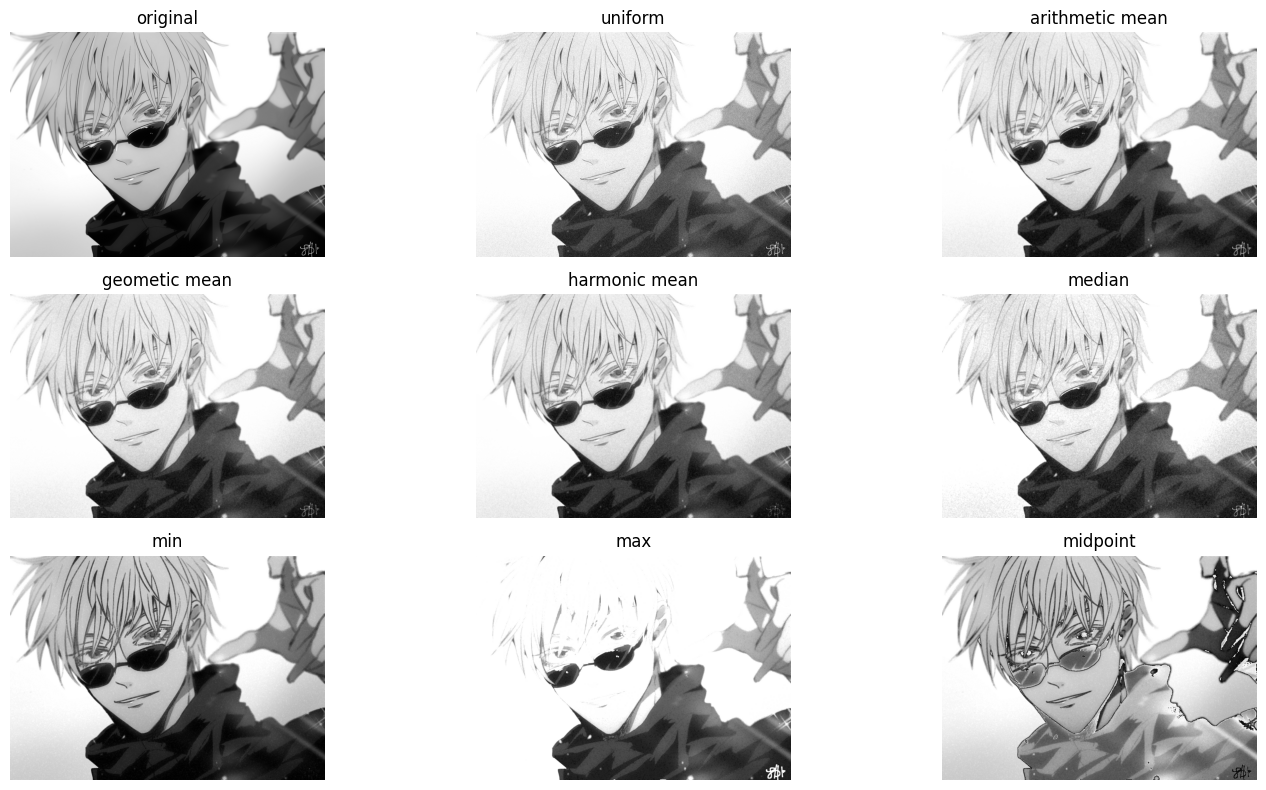

In [110]:
img_list = [satoru,Gsatoru,a,b,c,d,e,f,g]
img_title = ['original','uniform','arithmetic mean','geometic mean','harmonic mean','median','min','max','midpoint']
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(img_list[i], cmap='gray')
    ax.set_title(img_title[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [111]:
Gsatoru = add_exponential_noise(satoru,5)
a,b,c,d,e,f,g = arithmetic_mean_filter(Gsatoru,5) , geometric_mean_filter(Gsatoru,5),harmonic_mean_filter(Gsatoru,5),median_filter(Gsatoru,5),min_filter(Gsatoru,5),max_filter(Gsatoru,5),mid_point_filter(Gsatoru,5)

C:\Users\prave\AppData\Local\Temp\ipykernel_2968\2672586117.py:12: RuntimeWarning: overflow encountered in scalar add
  mid_point  = (max_value + min_value) // 2


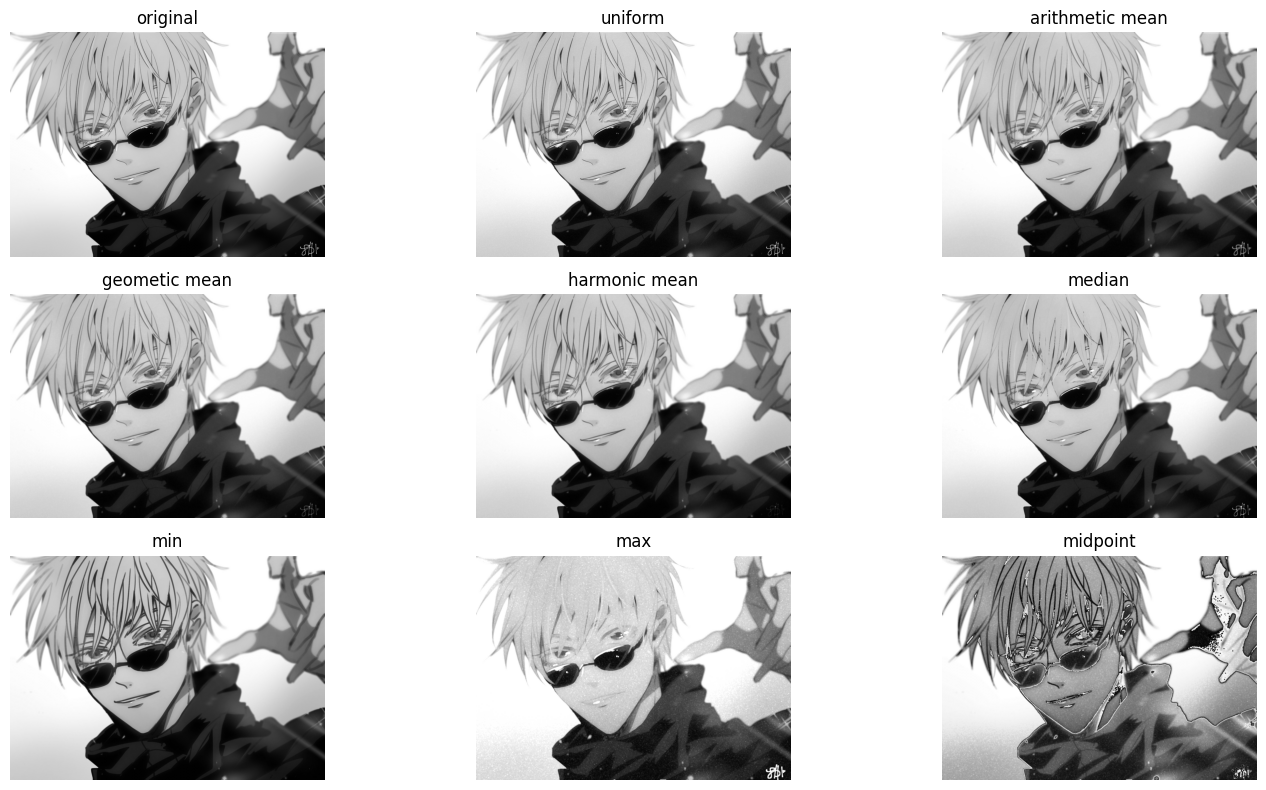

In [112]:
img_list = [satoru,Gsatoru,a,b,c,d,e,f,g]
img_title = ['original','exponential','arithmetic mean','geometic mean','harmonic mean','median','min','max','midpoint']
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(img_list[i], cmap='gray')
    ax.set_title(img_title[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [113]:
Gsatoru = add_gamma_noise(satoru,10,3)
a,b,c,d,e,f,g = arithmetic_mean_filter(Gsatoru,5) , geometric_mean_filter(Gsatoru,5),harmonic_mean_filter(Gsatoru,5),median_filter(Gsatoru,5),min_filter(Gsatoru,5),max_filter(Gsatoru,5),mid_point_filter(Gsatoru,5)

C:\Users\prave\AppData\Local\Temp\ipykernel_2968\2672586117.py:12: RuntimeWarning: overflow encountered in scalar add
  mid_point  = (max_value + min_value) // 2


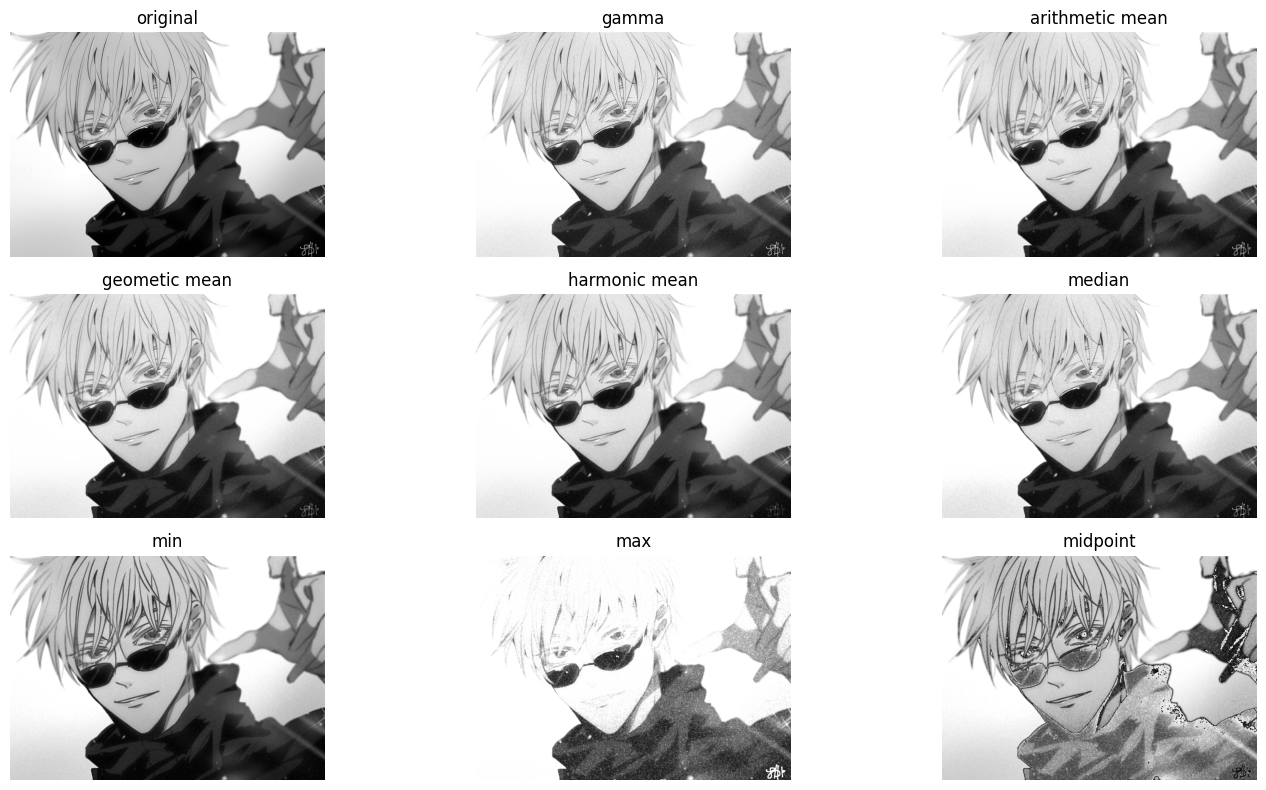

In [114]:
img_list = [satoru,Gsatoru,a,b,c,d,e,f,g]
img_title = ['original','gamma','arithmetic mean','geometic mean','harmonic mean','median','min','max','midpoint']
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(img_list[i], cmap='gray')
    ax.set_title(img_title[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [115]:
Gsatoru = add_rayleigh_noise(satoru,10)
a,b,c,d,e,f,g = arithmetic_mean_filter(Gsatoru,5) , geometric_mean_filter(Gsatoru,5),harmonic_mean_filter(Gsatoru,5),median_filter(Gsatoru,5),min_filter(Gsatoru,5),max_filter(Gsatoru,5),mid_point_filter(Gsatoru,5)

C:\Users\prave\AppData\Local\Temp\ipykernel_2968\2672586117.py:12: RuntimeWarning: overflow encountered in scalar add
  mid_point  = (max_value + min_value) // 2


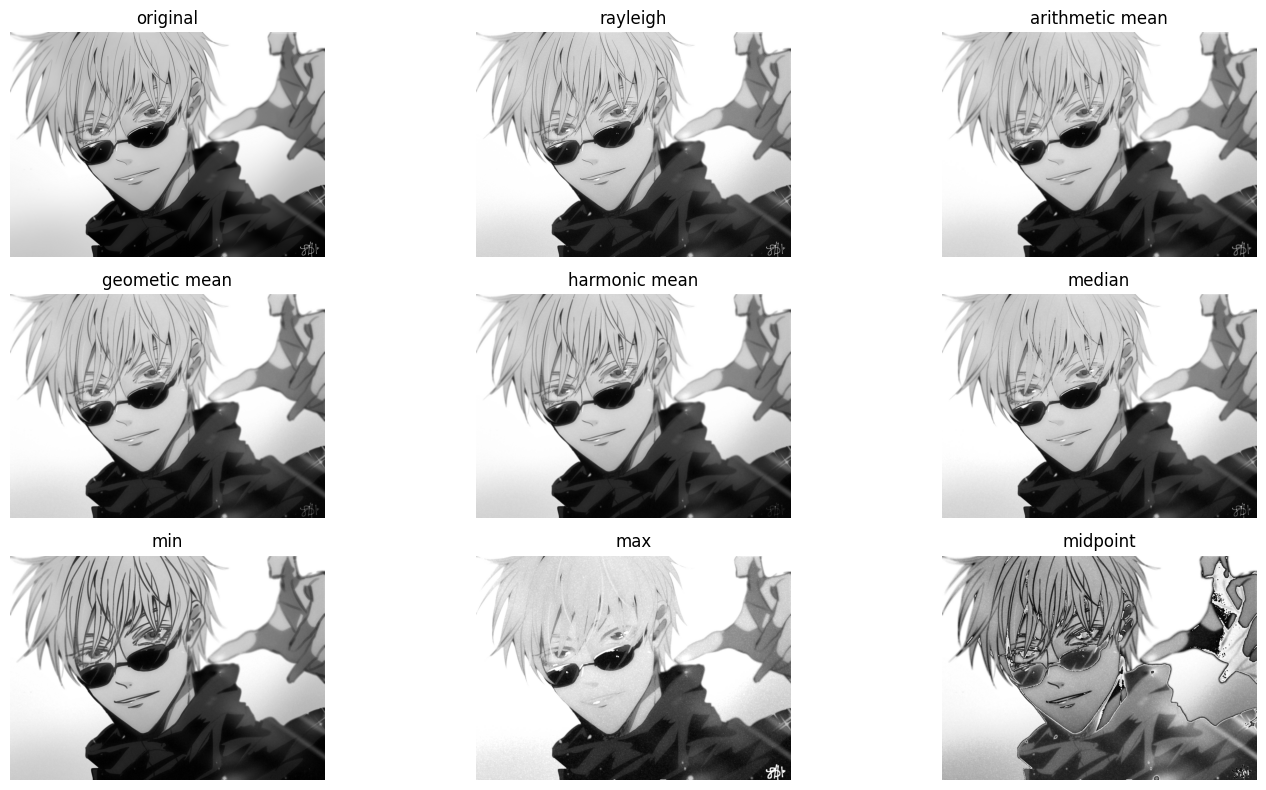

In [116]:
img_list = [satoru,Gsatoru,a,b,c,d,e,f,g]
img_title = ['original','rayleigh','arithmetic mean','geometic mean','harmonic mean','median','min','max','midpoint']
fig, axes = plt.subplots(3, 3, figsize=(15, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(img_list[i], cmap='gray')
    ax.set_title(img_title[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

**SOBEL FILTER**

In [69]:
def sobel_filter(img):
    kernelx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernely = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    gx = np.zeros_like(img, dtype=np.int64)
    gy = np.zeros_like(img, dtype=np.int64)
    padded_img = cv2.copyMakeBorder(img,1,1,1,1, cv2.BORDER_REFLECT)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            win = padded_img[i:i+3, j:j+3]
            gx[i, j] = np.sum(win * kernelx)
            gy[i, j] = np.sum(win * kernely)
    result_img = np.hypot(gx, gy)
    result_img = np.clip(result_img, 0, 255)
    return result_img.astype(np.uint8)

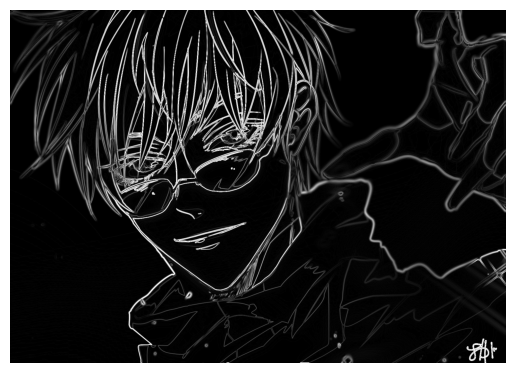

In [70]:
plot_image(sobel_filter(satoru))